In [1]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics
from scipy import stats

# Regression
import statsmodels.api as sm

In [2]:
# Load dataset
df = pd.read_csv("sales_data.csv")

# Display first rows
df.head()


,Date,Product,Quantity,Price,Customer_ID,Region,Total_Sales
0,2024-01-01,Phone,7,37300,CUST001,East,261100
1,2024-01-02,Headphones,4,15406,CUST002,North,61624
2,2024-01-03,Phone,2,21746,CUST003,West,43492
3,2024-01-04,Headphones,1,30895,CUST004,East,30895
4,2024-01-05,Laptop,8,39835,CUST005,North,318680


In [3]:
# Descriptive statistics for numerical columns
desc_stats = df.describe()
print(desc_stats)

         Quantity         Price    Total_Sales
count  100.000000    100.000000     100.000000
mean     4.780000  25808.510000  123650.480000
std      2.588163  13917.630242  100161.085275
min      1.000000   1308.000000    6540.000000
25%      2.750000  14965.250000   39517.500000
50%      5.000000  24192.000000   97955.500000
75%      7.000000  38682.250000  175792.500000
max      9.000000  49930.000000  373932.000000


In [5]:
print(df.columns)

Index(['Date', 'Product', 'Quantity', 'Price', 'Customer_ID', 'Region',
       'Total_Sales'],
      dtype='object')


In [8]:
# Individual statistics example for Sales column
mean_sales = df['Total_Sales'].mean()
median_sales = df['Total_Sales'].median()
mode_sales = df['Total_Sales'].mode()[0]
std_sales = df['Total_Sales'].std()

print("Mean:", mean_sales)
print("Median:", median_sales)
print("Mode:", mode_sales)
print("Standard Deviation:", std_sales)

Mean: 123650.48
Median: 97955.5
Mode: 6540
Standard Deviation: 100161.08527499213


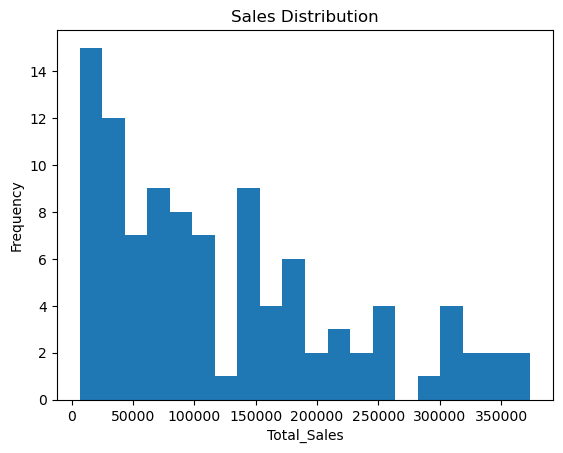

In [10]:
plt.hist(df['Total_Sales'], bins=20)
plt.xlabel("Total_Sales")
plt.ylabel("Frequency")
plt.title("Sales Distribution")
plt.show()

C:\Users\Naveen Reddy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


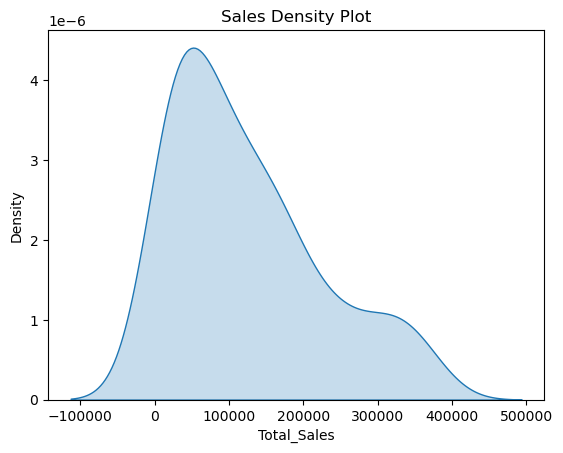

In [11]:
sns.kdeplot(df['Total_Sales'], fill=True)
plt.title("Sales Density Plot")
plt.show()

In [13]:
stat, p_value = stats.shapiro(df['Total_Sales'])

print("Test Statistic:", stat)
print("p-value:", p_value)

Test Statistic: 0.8989264965057373
p-value: 1.259116629626078e-06


In [17]:
correlation = df[['Total_Sales', 'Quantity', 'Price', ]].corr()
print(correlation)

             Total_Sales  Quantity     Price
Total_Sales     1.000000  0.688107  0.646131
Quantity        0.688107  1.000000  0.008014
Price           0.646131  0.008014  1.000000


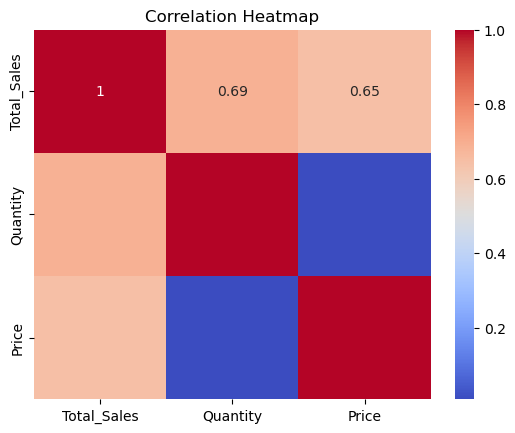

In [18]:
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [19]:
t_stat, p_value = stats.ttest_1samp(df['Total_Sales'], 500)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 12.29524217533092
p-value: 1.2041440754321787e-21


In [20]:
region1 = df[df['Region'] == 'East']['Total_Sales']
region2 = df[df['Region'] == 'West']['Total_Sales']

t_stat, p_value = stats.ttest_ind(region1, region2)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 2.0202108796829767
p-value: 0.049619032636626016


In [21]:
groups = [group['Total_Sales'].values for name, group in df.groupby('Region')]

f_stat, p_value = stats.f_oneway(*groups)
print("F-statistic:", f_stat)
print("p-value:", p_value)


F-statistic: 2.1643634298978425
p-value: 0.09723678084980039


In [22]:
confidence_level = 0.95
sales_mean = df['Total_Sales'].mean()
sales_std = df['Total_Sales'].std()
n = len(df)

margin_of_error = stats.norm.ppf(0.975) * (sales_std / np.sqrt(n))

lower = sales_mean - margin_of_error
upper = sales_mean + margin_of_error

print("95% Confidence Interval:", (lower, upper))

95% Confidence Interval: (104019.26802085702, 143281.69197914295)


In [23]:
# Independent variable
X = df['Total_Sales']

# Dependent variable
y = df[ 'Price']

# Add constant
X = sm.add_constant(X)

# Build model
model = sm.OLS(y, X).fit()

# Summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     70.24
Date:                Sat, 10 Jan 2026   Prob (F-statistic):           3.88e-13
Time:                        19:36:42   Log-Likelihood:                -1068.5
No. Observations:                 100   AIC:                             2141.
Df Residuals:                      98   BIC:                             2146.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.471e+04   1701.339      8.644      

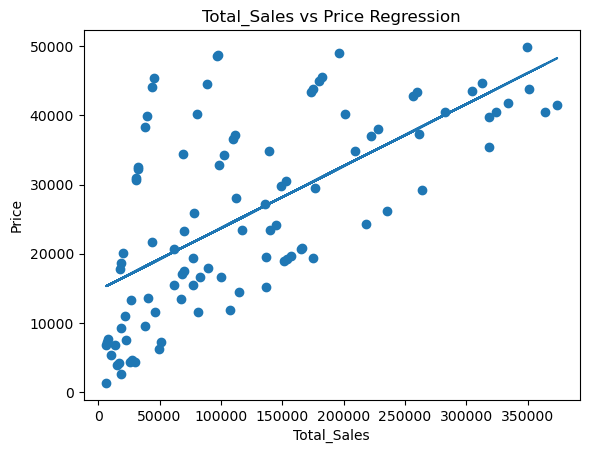

In [24]:
plt.scatter(df['Total_Sales'], df['Price'])
plt.plot(df['Total_Sales'], model.predict(X))
plt.xlabel("Total_Sales")
plt.ylabel("Price")
plt.title("Total_Sales vs Price Regression")
plt.show()